In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../CatanResults/catan_results_MCTSNN.csv")

In [5]:
data['Winner Type'].value_counts()['MCTSNN'] / len(data)

0.1693548387096774

In [7]:
data['Winner Type'].value_counts()

Random    206
MCTSNN     42
Name: Winner Type, dtype: int64

In [8]:
MCTSfirst = data.loc[data['First Player Type'] == "MCTSNN"]
MCTSsecond = data.loc[data['Second Player Type'] == "MCTSNN"]
MCTSthird = data.loc[data['Third Player Type'] == "MCTSNN"]

In [9]:
p3_vals = MCTSthird['Third Player VP'].value_counts()
p2_vals = MCTSsecond['Second Player VP'].value_counts()
p1_vals = MCTSfirst['First Player VP'].value_counts()

In [19]:
p3_vals

2     39
3     13
10     7
5      6
4      5
7      3
6      2
11     1
8      1
Name: Third Player VP, dtype: int64

In [20]:
p3 = np.asarray([p3_vals[2], p3_vals[3], p3_vals[4], p3_vals[5], p3_vals[6], \
     p3_vals[7], p3_vals[8], 0, p3_vals[10], p3_vals[11], 0])
p2 = np.asarray([p2_vals[2], p2_vals[3], p2_vals[4], p2_vals[5], \
     p2_vals[6], p2_vals[7], p2_vals[8], p2_vals[9], p2_vals[10], p2_vals[11], 0])
p1 = np.asarray([p1_vals[2], p1_vals[3], p1_vals[4], p1_vals[5], 0, \
     p1_vals[7], p1_vals[8], 0, p1_vals[10], p1_vals[11], 0])
p3 = tuple(p3 / len(MCTSthird))
p2 = tuple(p2 / len(MCTSsecond))
p1 = tuple(p1 / len(MCTSfirst))

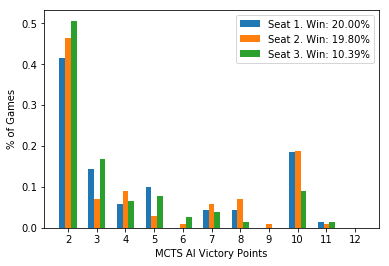

In [25]:
width = 0.2
ind = np.asarray((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
pl1 = plt.bar(ind - width, p1, width)
pl2 = plt.bar(ind, p2, width)
pl3 = plt.bar(ind + width, p3, width)
plt.xticks(ind)
plt.xlabel('MCTS AI Victory Points')
plt.ylabel('% of Games')
plt.legend((pl1[0], pl2[0], pl3[0]), \
           ('Seat 1. Win: 20.00%', 'Seat 2. Win: 19.80%', 'Seat 3. Win: 10.39%'))
plt.show()

In [22]:
winsFirst = MCTSfirst['Winner Num'].value_counts()
winsSecond = MCTSsecond['Winner Num'].value_counts()
winsThird = MCTSthird['Winner Num'].value_counts()

In [23]:
p1_win_rate = winsFirst[1] / (winsFirst[1] + winsFirst[2] + winsFirst[3])
p2_win_rate = winsSecond[2] / (winsSecond[1] + winsSecond[2] + winsSecond[3])
p3_win_rate = winsThird[3] / (winsThird[1] + winsThird[2] + winsThird[3])

In [24]:
print(p1_win_rate)
print(p2_win_rate)
print(p3_win_rate)

0.2
0.19801980198019803
0.1038961038961039


In [26]:
((MCTSfirst['Num Initial Dots Player 1'].count() * \
MCTSfirst['Num Initial Dots Player 1'].mean()) + \
(MCTSsecond['Num Initial Dots Player 2'].count() * \
MCTSsecond['Num Initial Dots Player 2'].mean()) + \
(MCTSthird['Num Initial Dots Player 3'].count() * \
MCTSthird['Num Initial Dots Player 3'].mean())) / \
(MCTSfirst['Num Initial Dots Player 1'].count() + \
MCTSsecond['Num Initial Dots Player 2'].count() + \
MCTSthird['Num Initial Dots Player 3'].count())

14.040322580645162

In [27]:
((MCTSfirst['Num Initial Dots Player 2'].count() * \
(MCTSfirst['Num Initial Dots Player 2'].mean() + \
 MCTSfirst['Num Initial Dots Player 3'].mean())) + \
(MCTSsecond['Num Initial Dots Player 2'].count() * \
(MCTSsecond['Num Initial Dots Player 1'].mean() + \
 MCTSsecond['Num Initial Dots Player 3'].mean())) + \
(MCTSthird['Num Initial Dots Player 2'].count() * \
(MCTSthird['Num Initial Dots Player 1'].mean() + \
 MCTSthird['Num Initial Dots Player 2'].mean()))) / \
(2 * (MCTSfirst['Num Initial Dots Player 1'].count() + \
MCTSsecond['Num Initial Dots Player 2'].count() + \
MCTSthird['Num Initial Dots Player 3'].count()))

12.90524193548387

In [28]:
data['MCTS Num Devs Bought'].mean()

4.69758064516129

In [29]:
devs_not_played = data['MCTS Num Devs Bought'] - data['MCTS Num Knights Played'] - \
data['MCTS Num YOP Played'] - data['MCTS Num Monopoly Played'] - \
data['MCTS Num Road Builder Played'] - data['MCTS Num VP Dev Cards']
devs_not_played.mean()

0.14919354838709678

In [30]:
data['MCTS Num Cities'].mean()

0.10080645161290322

In [31]:
data['MCTS Num Settlements'].mean()

2.314516129032258

In [32]:
data['MCTS Num Roads'].mean()

7.028225806451613

In [33]:
data['MCTS Total Trades Accepted'].mean()

13.540322580645162

In [34]:
data['MCTS Trades Proposed Successfully'].mean()

31.467741935483872

In [35]:
(len(MCTSfirst.loc[MCTSfirst['Largest Army Player'] == 1]) + \
len(MCTSsecond.loc[MCTSsecond['Largest Army Player'] == 2]) + \
len(MCTSthird.loc[MCTSthird['Largest Army Player'] == 3])) / 515

0.13009708737864079

In [36]:
(len(MCTSfirst.loc[MCTSfirst['Longest Road Player'] == 1]) + \
len(MCTSsecond.loc[MCTSsecond['Longest Road Player'] == 2]) + \
len(MCTSthird.loc[MCTSthird['Longest Road Player'] == 3])) / 515

0.09514563106796116

In [38]:
data['MCTS Num Ports'].mean()

0.6370967741935484

In [39]:
data['MCTS Total Trades Proposed'].mean()

134.85887096774192

In [40]:
data['Number Rounds'].mean()

89.45161290322581

In [46]:
data['MCTS Total Trades Proposed'].mean() / data['Number Rounds'].mean()

1.507618103137396